Taxi Database
http://www.andresmh.com/nyctaxitrips/

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows',10)
%matplotlib inline

path = 'data/result.h5'
pd.__version__

'0.16.0-230-ga6ae1af'

In [9]:
# inspect
trip = pd.read_csv('data/trip_data_1.csv',
                 nrows=5,
                 usecols="medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance".split(','))                    
trip

,medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,2013-01-01 15:11:48,2013-01-01 15:18:10,4,1.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-06 00:18:35,2013-01-06 00:22:54,1,1.5
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-05 18:49:41,2013-01-05 18:54:23,1,1.1
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:54:15,2013-01-07 23:58:20,2,0.7
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:25:03,2013-01-07 23:34:24,1,2.1


In [10]:
trip.dtypes

medallion            object
hack_license         object
pickup_datetime      object
dropoff_datetime     object
passenger_count       int64
trip_distance       float64
dtype: object

In [11]:
# object->datetime64ns
pd.to_datetime(trip['dropoff_datetime'],infer_datetime_format=True)

0   2013-01-01 15:18:10
1   2013-01-06 00:22:54
2   2013-01-05 18:54:23
3   2013-01-07 23:58:20
4   2013-01-07 23:34:24
Name: dropoff_datetime, dtype: datetime64[ns]

In [12]:
# object->categorical
trip['medallion'].astype('category')

0    89D227B655E5C82AECF13C3F540D4CF4
1    0BD7C8F5BA12B88E0B67BED28BEA73D8
2    0BD7C8F5BA12B88E0B67BED28BEA73D8
3    DFD2202EE08F7A8DC9A57B02ACB81FE2
4    DFD2202EE08F7A8DC9A57B02ACB81FE2
Name: medallion, dtype: category
Categories (3, object): [0BD7C8F5BA12B88E0B67BED28BEA73D8, 89D227B655E5C82AECF13C3F540D4CF4, DFD2202EE08F7A8DC9A57B02ACB81FE2]

In [13]:
# inspect
fare = pd.read_csv('data/trip_fare_1.csv',
                   nrows=5,
                   skipinitialspace=True,
                   usecols="medallion,hack_license,pickup_datetime,total_amount".split(','))                    
fare

,medallion,hack_license,pickup_datetime,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,2013-01-01 15:11:48,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-06 00:18:35,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-05 18:49:41,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:54:15,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:25:03,10.5


In [14]:
# merge
pd.merge(trip,fare, on=['medallion','hack_license','pickup_datetime'])

,medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,2013-01-01 15:11:48,2013-01-01 15:18:10,4,1.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-06 00:18:35,2013-01-06 00:22:54,1,1.5,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-05 18:49:41,2013-01-05 18:54:23,1,1.1,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:54:15,2013-01-07 23:58:20,2,0.7,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:25:03,2013-01-07 23:34:24,1,2.1,10.5


In [15]:
# to_hdf
trip.to_hdf('trip.hdf','df',mode='w',format='table')
pd.read_hdf('trip.hdf','df')

,medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,2013-01-01 15:11:48,2013-01-01 15:18:10,4,1.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-06 00:18:35,2013-01-06 00:22:54,1,1.5
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-05 18:49:41,2013-01-05 18:54:23,1,1.1
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:54:15,2013-01-07 23:58:20,2,0.7
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:25:03,2013-01-07 23:34:24,1,2.1


In [36]:
# read
# merged
# convert
# to_hdf

def read_and_convert_data():

    def parse_dates(df, name):
        df[name] = pd.to_datetime(df[name], infer_datetime_format=True)
        return df

    def parse_cats(df, name):
        df[name] = df[name].astype('category')
        return df
    
    trip = pd.read_csv('data/trip_data_1.csv',
                       usecols="medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance".split(','))                    
    fare = pd.read_csv('data/trip_fare_1.csv',
                       skipinitialspace=True,
                       usecols="medallion,hack_license,pickup_datetime,total_amount".split(','))                    

    merged = pd.merge(trip, fare, on=['medallion','hack_license','pickup_datetime'])
    merged = parse_dates(merged,'pickup_datetime')
    merged = parse_dates(merged,'dropoff_datetime')
    merged = parse_cats(merged, 'medallion')
    merged = parse_cats(merged, 'hack_license')
    merged.to_hdf(path,'df',mode='w',format='table',data_columns=['medallion','hack_license'])

In [37]:
%timeit -n 1 -r 1 read_and_convert_data()

1 loops, best of 1: 2min 12s per loop


In [16]:
df = pd.read_hdf(path,'df')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14776615 entries, 0 to 14776614
Data columns (total 7 columns):
medallion           category
hack_license        category
pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
passenger_count     int64
trip_distance       float64
total_amount        float64
dtypes: category(2), datetime64[ns](2), float64(2), int64(1)
memory usage: 733.1 MB


In [4]:
# uniques for the medallions
len(df.medallion.cat.categories)

13426

In [5]:
# uniques for the hack license
len(df.hack_license.cat.categories)

32224

In [43]:
# lengh of the ride
df['length'] = df['dropoff_datetime']-df['pickup_datetime']

In [44]:
df['length'].describe()

count                    14776615
mean     -1 days +23:50:37.187079
std        0 days 00:19:05.019824
min             -1 days +15:46:51
25%               0 days 00:06:00
50%               0 days 00:09:15
75%               0 days 00:14:46
max              21 days 00:29:24
Name: length, dtype: object

In [45]:
# replace invalid values
df.loc[df['length']<0,'length'] = np.nan
df['length'].describe()

count                    14776567
mean     -1 days +23:50:37.187276
std        0 days 00:19:04.993931
min               0 days 00:00:00
25%               0 days 00:06:00
50%               0 days 00:09:15
75%               0 days 00:14:46
max              21 days 00:29:24
Name: length, dtype: object

In [46]:
# select based on a subset
df.loc[df['length'].nlargest(5).index]

,medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,total_amount,length
7560979,862921D5C13425C2DBDB7D065231FB1E,0C1A981E411908D59CB5D8A45097C0B6,2013-01-03 15:30:01,2013-01-24 15:59:25,1,9.8,35.80,21 days 00:29:24
13762640,128307B5B4418255867779D6E0814FCC,8865ED00BB9261FE4A450A33905C7CB2,2013-01-03 23:02:11,2013-01-24 23:13:23,1,1.9,13.65,21 days 00:11:12
14040247,128307B5B4418255867779D6E0814FCC,8865ED00BB9261FE4A450A33905C7CB2,2013-01-05 23:03:51,2013-01-26 23:11:04,1,1.1,9.37,21 days 00:07:13
10959787,1BEEA74F93CD153F6CAF0601551EFBFC,4D5B9D2700B465B742161DF320C51BCA,2013-01-08 17:56:04,2013-01-29 18:00:49,1,0.8,8.40,21 days 00:04:45
7916523,128307B5B4418255867779D6E0814FCC,A1D1E7C658D78B1906F8FCE575467B74,2013-01-07 12:37:21,2013-01-21 12:39:01,2,0.4,4.00,14 days 00:01:40


In [47]:
# histogramming
df['passenger_count'].value_counts()

1      10471701
2       1986196
5        920006
3        597485
6        520066
4        280992
0           166
255           1
208           1
9             1
dtype: int64

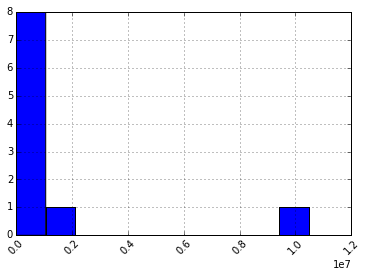

In [48]:
df['passenger_count'].value_counts().hist(xrot=45)

In [17]:
# we have dates
df['pickup_datetime'].describe()

count                14776615
unique                2303465
top       2013-01-31 19:53:00
freq                      375
first     2013-01-01 00:00:00
last      2013-01-31 23:59:59
Name: pickup_datetime, dtype: object

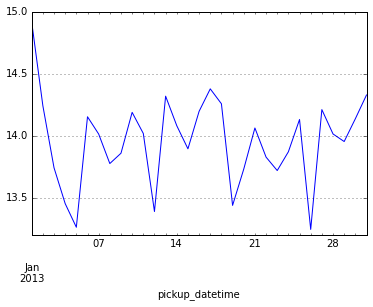

In [7]:
# fare over time
df.set_index('pickup_datetime')['total_amount'].resample('D',how='mean').plot()

In [49]:
# focus on distance
df['trip_distance'].describe()

count    14776615.000000
mean            2.770976
std             3.305923
min             0.000000
25%             1.000000
50%             1.700000
75%             3.060000
max           100.000000
Name: trip_distance, dtype: float64

In [50]:
length_in_hours = df['length'] / np.timedelta64(1,'h')
length_in_hours

0           0.106111
1           0.071944
2           0.078333
3           0.068056
4           0.155833
              ...   
14776610    0.216944
14776611    0.139722
14776612    0.089444
14776613    0.203056
14776614    0.072222
Name: length, dtype: float64

In [51]:
# new frame via assign
r = df.assign(speed=df['trip_distance']/length_in_hours)
r

,medallion,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,total_amount,length,speed
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,2013-01-01 15:11:48,2013-01-01 15:18:10,4,1.0,7.0,00:06:22,9.424084
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-06 00:18:35,2013-01-06 00:22:54,1,1.5,7.0,00:04:19,20.849421
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,2013-01-05 18:49:41,2013-01-05 18:54:23,1,1.1,7.0,00:04:42,14.042553
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:54:15,2013-01-07 23:58:20,2,0.7,6.0,00:04:05,10.285714
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,2013-01-07 23:25:03,2013-01-07 23:34:24,1,2.1,10.5,00:09:21,13.475936
...,...,...,...,...,...,...,...,...,...
14776610,B33E71CD9E8FE1BE3B70FEB6E807DD15,BAF57796E45D921BB23217E17A372FF6,2013-01-06 04:58:23,2013-01-06 05:11:24,1,3.3,14.0,00:13:01,15.211268
14776611,ED160B76D5349C8AC1ECF22CD4B8D538,3B93F6DA5DEBDE9560993FA624C4FF76,2013-01-08 14:42:04,2013-01-08 14:50:27,1,1.0,8.0,00:08:23,7.157058
14776612,D83F9AC0E33F6F19869C243BE6AB6FE5,85A55B6772275374EF90AC9457DC1F83,2013-01-10 13:29:23,2013-01-10 13:34:45,1,0.9,6.5,00:05:22,10.062112
14776613,04E59442A7DDBCE515E33CD355D866E7,7913172189931A1A1632562B10AB53C4,2013-01-06 16:30:15,2013-01-06 16:42:26,1,1.3,10.0,00:12:11,6.402189


In [52]:
r['speed'].describe()

count    1.475238e+07
mean              inf
std               NaN
min      0.000000e+00
25%      9.081081e+00
50%      1.200000e+01
75%      1.608022e+01
max               inf
Name: speed, dtype: float64

In [53]:
# bad values
r.loc[np.isinf(r['speed']),'speed'] = np.nan
r['speed'].describe()

count    14742259.000000
mean           14.591121
std           129.947198
min             0.000000
25%             9.075630
50%            12.000000
75%            16.071429
max        125280.000000
Name: speed, dtype: float64

In [54]:
r['speed'] = r['speed'].clip_upper(100)
r['speed'].describe()

count    14742259.000000
mean           13.488805
std             7.124750
min             0.000000
25%             9.075630
50%            12.000000
75%            16.071429
max           100.000000
Name: speed, dtype: float64

In [56]:
r['total_amount'].describe()

count    14776615.000000
mean           13.952985
std            11.464686
min             2.500000
25%             7.700000
50%            10.500000
75%            15.500000
max           650.000000
Name: total_amount, dtype: float64

In [57]:
r['total_amount'].corr(r['trip_distance'])

0.87083268780165857

In [58]:
r['total_amount'].corr(r['speed'])

0.50115380621280714

In [59]:
td = r.groupby(pd.qcut(r['trip_distance'],10)).mean()
td

,passenger_count,trip_distance,total_amount,speed
trip_distance,,,,
"[0, 0.66]",1.607301,0.442264,7.526243,9.191086
"(0.66, 0.9]",1.630489,0.796659,7.019489,10.612871
"(0.9, 1.13]",1.728567,1.033297,7.982222,10.903866
"(1.13, 1.4]",1.680272,1.282398,8.940826,11.212023
"(1.4, 1.7]",1.712682,1.572817,10.029136,11.642905
"(1.7, 2.1]",1.715527,1.917775,11.293548,12.196089
"(2.1, 2.68]",1.746597,2.379095,12.841359,12.935133
"(2.68, 3.6]",1.702255,3.097016,15.290410,14.030745
"(3.6, 5.81]",1.729555,4.524360,19.827871,16.603463


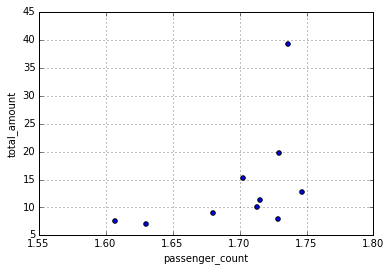

In [62]:
td.plot('passenger_count','total_amount',kind='scatter')

In [67]:
r.groupby(r['hack_license'])['total_amount'].sum().order(ascending=False).describe()

count    32224.000000
mean      6398.271084
std       2928.515207
min          2.600000
25%       4587.935000
50%       6786.615000
75%       8425.967500
max      31918.100000
Name: total_amount, dtype: float64